### Hyperparameters tuning for  K-Means Clustering, DBSCAN clustering, mean-shift clustering  
###### -Number of clusters
###### -Seeds - initial values
###### -Distance measures
###### data : https://github.com/thoswanzey/K-Means-Clustering-Python-Implementation/blob/master/data_1024.csv

In [2]:
#importing needed libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 



In [3]:
from sklearn import metrics 
from sklearn.metrics  import silhouette_score

from sklearn.model_selection import ParameterGrid

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift

#### load and prepare Data

In [4]:
data = pd.read_csv('data_1024.csv', sep ='\t')
data.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


In [5]:
data.shape

(4000, 3)

In [6]:
# check data for null values  
data[data.isnull().any(axis=1)]

,Driver_ID,Distance_Feature,Speeding_Feature


### K-means Tuning 

In [7]:
# drop ID climns not needed as a feature
features = data.drop('Driver_ID', axis =1)

In [8]:
# set the parameters to be tested
parameters = {'n_clusters': [2,3,4,5,10,20,30]}
parameter_grid = ParameterGrid(parameters)

In [9]:
list(parameter_grid)

[{'n_clusters': 2},
 {'n_clusters': 3},
 {'n_clusters': 4},
 {'n_clusters': 5},
 {'n_clusters': 10},
 {'n_clusters': 20},
 {'n_clusters': 30}]

In [10]:
# select the model with the best silhouette_score
best_score =-1 
model =KMeans()

In [11]:
# trainin models with diffrent parameters 

for g in parameter_grid:
    model.set_params(**g)
    model.fit(features)
    
    ss=metrics.silhouette_score(features, model.labels_)
    print('Parameter: ', g, 'Score: ', ss)
    if ss> best_score:
        best_score = ss
        best_grid = g

Parameter:  {'n_clusters': 2} Score:  0.8490223286225532
Parameter:  {'n_clusters': 3} Score:  0.8231396834167266
Parameter:  {'n_clusters': 4} Score:  0.5907475009381601
Parameter:  {'n_clusters': 5} Score:  0.5126418286009667
Parameter:  {'n_clusters': 10} Score:  0.4373046355523129
Parameter:  {'n_clusters': 20} Score:  0.3675899531973345
Parameter:  {'n_clusters': 30} Score:  0.34784881045197413


In [12]:
best_grid

{'n_clusters': 2}

###### best parameters for number of cluster is two 

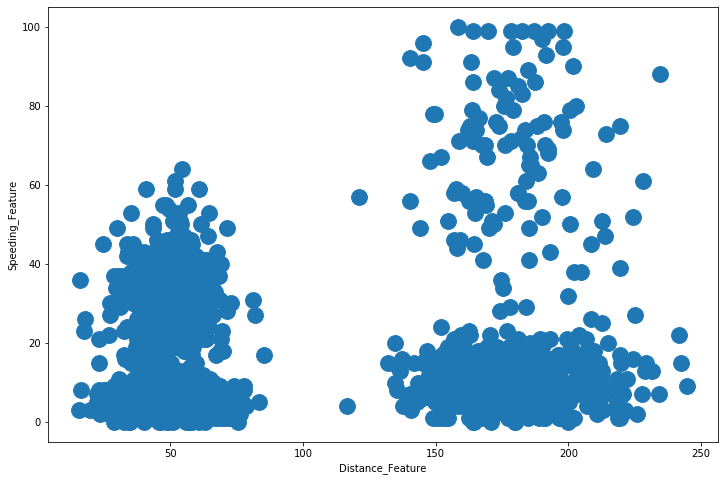

In [13]:
# plot a scatter plot for speeding and distance feature for all 4000 points 
fig, ax = plt.subplots(figsize =(12,8))

plt.scatter(features['Distance_Feature'],
            features['Speeding_Feature'], s=250 )

plt.xlabel('Distance_Feature')
plt.ylabel('Speeding_Feature')

plt.show()

##### notice on the on the plot 2 classes easily identified 

### DBSCAN tuning 

In [14]:
# eps : the minimum distance for points to be considred neighbors
# min_samples : minimum points required to from a dense region 
# assign a range of values for eps and mis_samples
parameters = {'eps' :  [0.9,1.0,5.0,10.0,12.0,14.0,20.0],
              'min_samples' :[5, 7, 10, 12]}

# instantiate a parameterGrid with the hyperparameters above and
# trains a model for every combination for hyperparameters values 
parameter_grid = ParameterGrid(parameters)
list(parameter_grid)

[{'eps': 0.9, 'min_samples': 5},
 {'eps': 0.9, 'min_samples': 7},
 {'eps': 0.9, 'min_samples': 10},
 {'eps': 0.9, 'min_samples': 12},
 {'eps': 1.0, 'min_samples': 5},
 {'eps': 1.0, 'min_samples': 7},
 {'eps': 1.0, 'min_samples': 10},
 {'eps': 1.0, 'min_samples': 12},
 {'eps': 5.0, 'min_samples': 5},
 {'eps': 5.0, 'min_samples': 7},
 {'eps': 5.0, 'min_samples': 10},
 {'eps': 5.0, 'min_samples': 12},
 {'eps': 10.0, 'min_samples': 5},
 {'eps': 10.0, 'min_samples': 7},
 {'eps': 10.0, 'min_samples': 10},
 {'eps': 10.0, 'min_samples': 12},
 {'eps': 12.0, 'min_samples': 5},
 {'eps': 12.0, 'min_samples': 7},
 {'eps': 12.0, 'min_samples': 10},
 {'eps': 12.0, 'min_samples': 12},
 {'eps': 14.0, 'min_samples': 5},
 {'eps': 14.0, 'min_samples': 7},
 {'eps': 14.0, 'min_samples': 10},
 {'eps': 14.0, 'min_samples': 12},
 {'eps': 20.0, 'min_samples': 5},
 {'eps': 20.0, 'min_samples': 7},
 {'eps': 20.0, 'min_samples': 10},
 {'eps': 20.0, 'min_samples': 12}]

In [15]:
# use silhoutte scoring to evaluate the model 
model =DBSCAN()
best_score =-1 

In [16]:
# trainin models with diffrent parameters 

for g in parameter_grid:
    model.set_params(**g)
    model.fit(features)
    
    ss=metrics.silhouette_score(features, model.labels_)
    print('Parameter: ', g, 'Score: ', ss)
    if ss> best_score:
        best_score = ss
        best_grid = g

Parameter:  {'eps': 0.9, 'min_samples': 5} Score:  -0.6057173612292268
Parameter:  {'eps': 0.9, 'min_samples': 7} Score:  -0.4265046999507063
Parameter:  {'eps': 0.9, 'min_samples': 10} Score:  -0.39254168253371013
Parameter:  {'eps': 0.9, 'min_samples': 12} Score:  -0.4286838741223884
Parameter:  {'eps': 1.0, 'min_samples': 5} Score:  -0.6155746493060738
Parameter:  {'eps': 1.0, 'min_samples': 7} Score:  -0.41637001640330673
Parameter:  {'eps': 1.0, 'min_samples': 10} Score:  -0.3837814631696031
Parameter:  {'eps': 1.0, 'min_samples': 12} Score:  -0.38648235283744914
Parameter:  {'eps': 5.0, 'min_samples': 5} Score:  0.31011275260225
Parameter:  {'eps': 5.0, 'min_samples': 7} Score:  0.7820011223700856
Parameter:  {'eps': 5.0, 'min_samples': 10} Score:  0.7974222681120255
Parameter:  {'eps': 5.0, 'min_samples': 12} Score:  0.7914367881923341
Parameter:  {'eps': 10.0, 'min_samples': 5} Score:  0.7598056658175874
Parameter:  {'eps': 10.0, 'min_samples': 7} Score:  0.8157570071704705
Par

In [17]:
# best possible values for the hyperparameters 
best_grid

{'eps': 20.0, 'min_samples': 5}

In [19]:
# DBSCAN Clustering setting the best hyperparameters for the model parameters  
model.set_params(**best_grid)
model.fit(features)

DBSCAN(algorithm='auto', eps=20.0, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [20]:
# number of cluster 
n_clusters = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
n_clusters

2

In [21]:
# number of noisy points ( data points with label -1 )
n_noise = list(model.labels_).count(-1)
n_noise

0

In [22]:
# test DBSCAN for another set of hyperparameters to check noisy points and nbr of clusters if changes  

another_grid = {'eps' :5.0, 'min_samples': 5}

model.set_params(**another_grid)
model.fit(features)

n_clusters = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
print('number of clusters: ', n_clusters )

n_noise = list(model.labels_).count(-1)
print('number of noisy pints : ', n_noise )

number of clusters:  7
number of noisy pints :  117


### Mean-shift clustering  tuning 
###### only one hyperparameter to tune " bandwidth" of the kernel 

In [25]:
from sklearn.cluster import estimate_bandwidth 
estimate_bandwidth(features)

33.960524729584314

###### the estimate bandwidth turns  as the best value for bandwidth 

In [28]:
# instantiate Meanshift model 
from sklearn.metrics  import silhouette_score
model = MeanShift(bandwidth =estimate_bandwidth(features)).fit(features)
metrics.silhouette_score(features, model.labels_)


0.8231396834167266